In [1]:
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # statistical plotting functions
sns.color_palette("viridis", as_cmap=True)
import pandas as pd # dataframes like in R
from copy import deepcopy
import numpy as np
from scipy import stats
import pprint
pp = pprint.PrettyPrinter(indent=2)
import os

current_dir = os.path.dirname(os.path.abspath(''))
project_directory = os.path.dirname(current_dir)

In [2]:
from mempyDEB.DEBODE.simulators import * # functions to run models
from mempyDEB.DEBODE.defaultparams import * # some default parameter configurations

In [3]:
# automatische aktualisierung externer Python-Dateien
%load_ext IPython.extensions.autoreload
%autoreload 2 

# Einbindung zusätzlicher Funktionen 
from utils import * 
from ModelFitting import *

c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


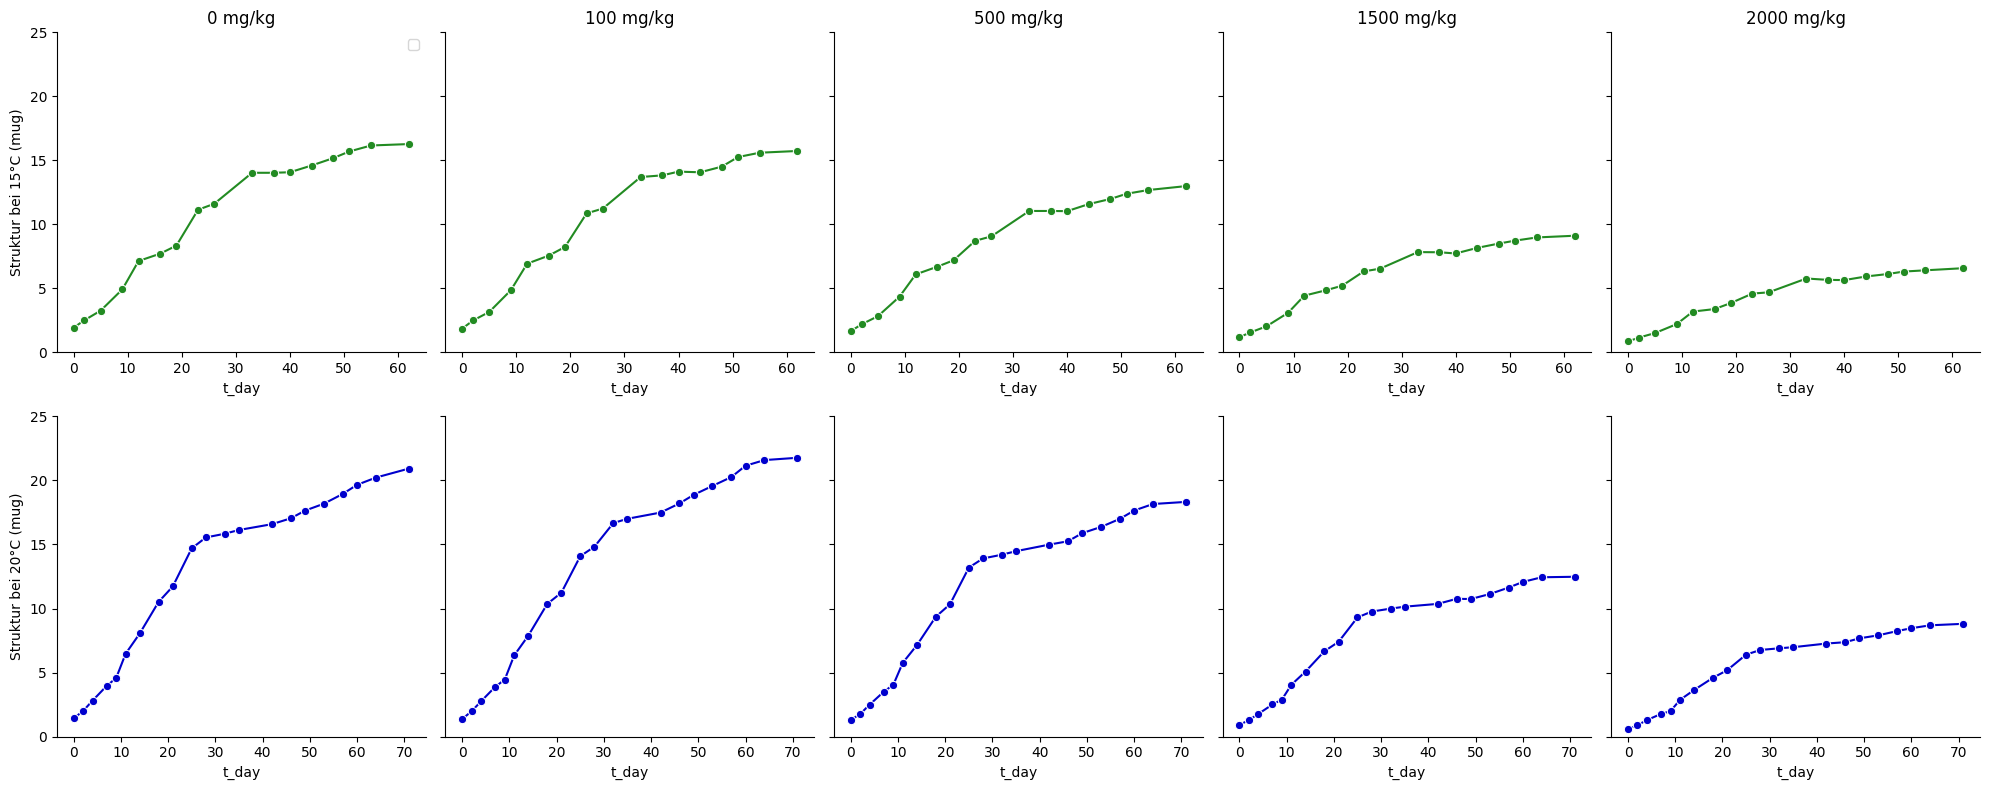

In [4]:
from Ex03_TKTDFitting_Folsomia import *

data = load_data()
_ = plot_data(data)

c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


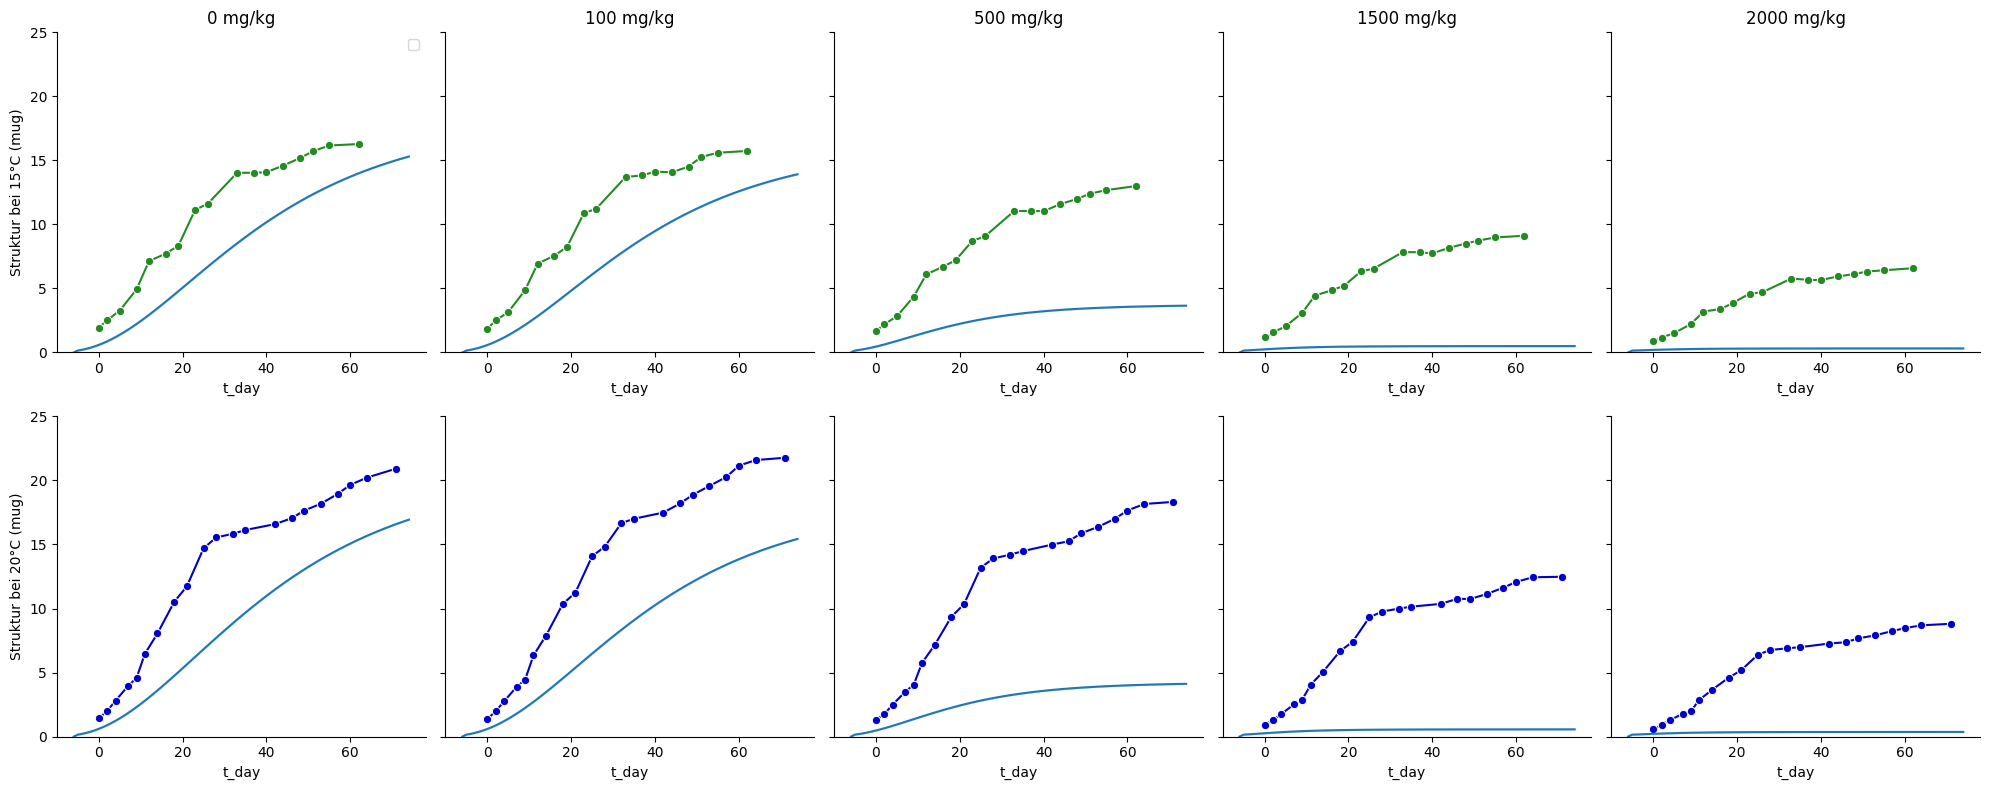

In [20]:
f = setup_modelfit('M')

sim_intguess = f.simulator(f.intguess)
fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_intguess)

In [6]:
#f = setup_modelfit("M")
f.run_optimization(
    bounds =[(0,1),(100,10_000),(1,10)], 
    options={'maxiter' : 2}
)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`


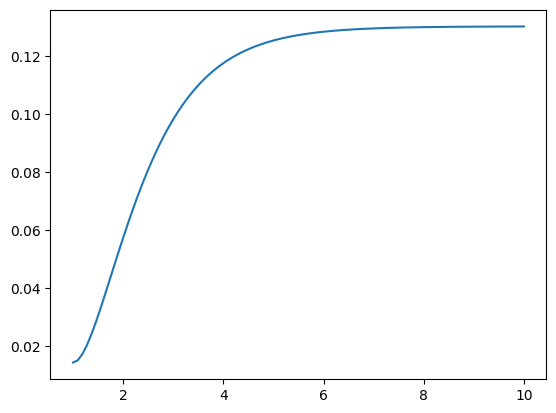

In [51]:
p = { 
    'kD_j' : 1.,
    'ED50_j' : 5000,
    'beta_j' : 2.
    }

liste = []
#x = np.arange(0,5,0.1)
x = np.linspace(1,10,100)
for ed in x:
    p['beta_j'] = ed
    res = f.simulator(p)
    liste.append(f.loss(res,f.data))

fig,ax = plt.subplots()
ax.plot(x,liste)


Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(1.0), 'ED50_j': np.float64(2862.8686556927296), 'beta_j': np.float64(1.8851508916323727)}


c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


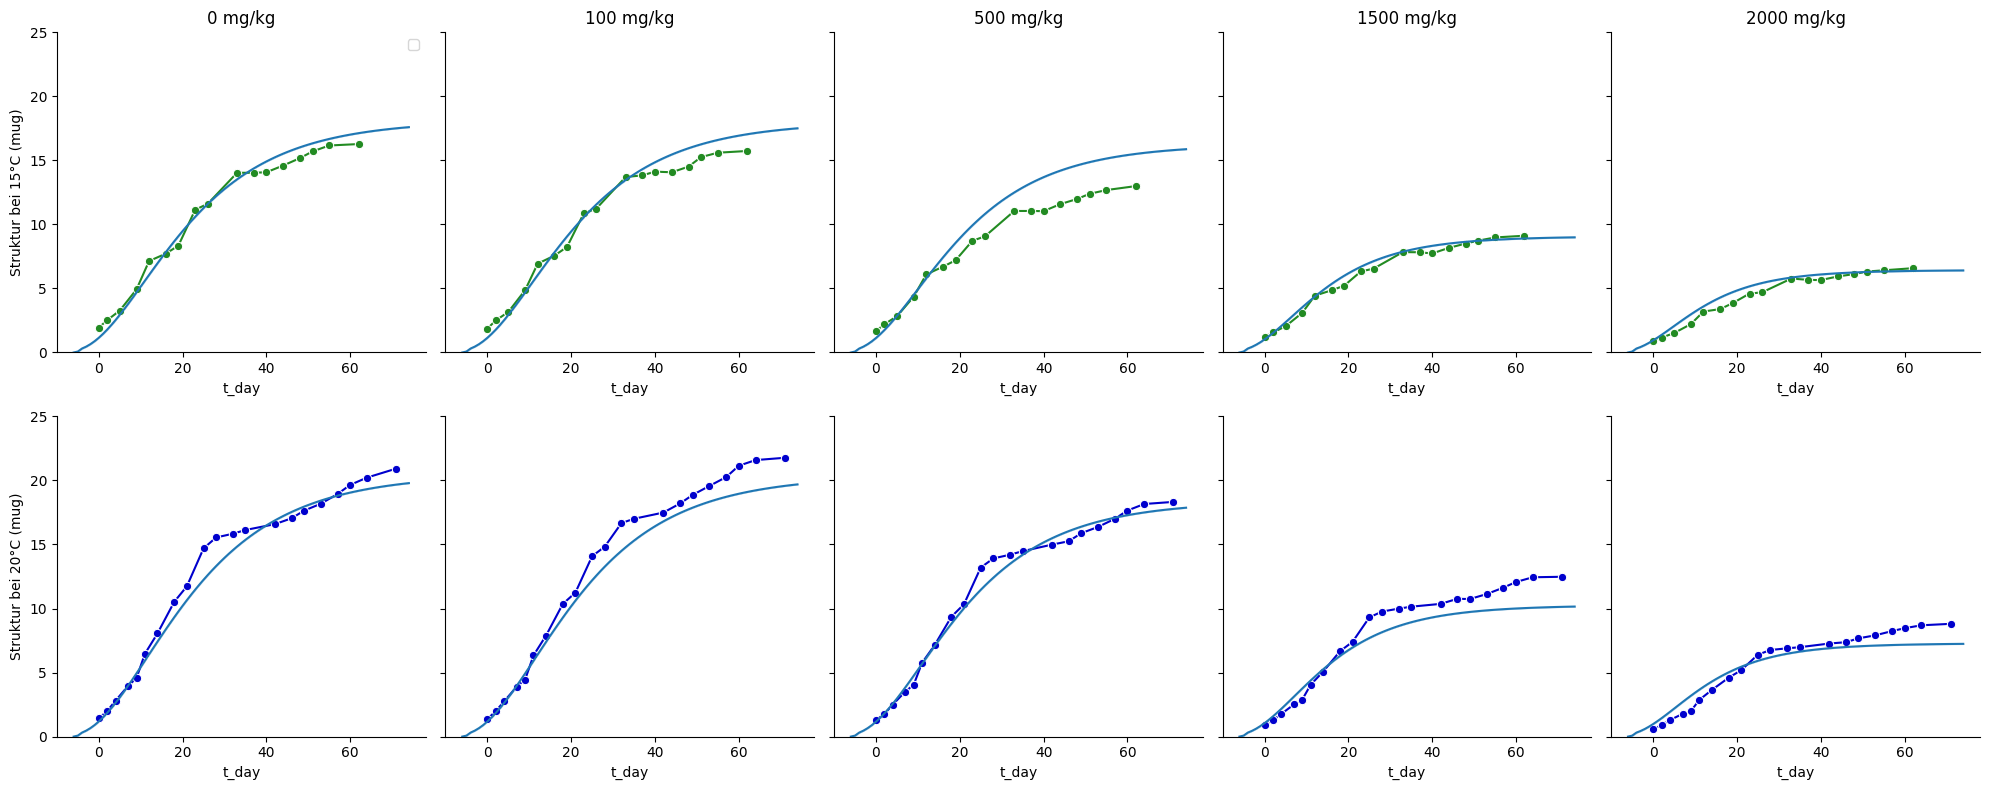

In [54]:
f = setup_modelfit('M')
f.run_optimization(
    bounds =[(0,1),(1000,10_000),(1,10)], 
    options={'maxiter' : 10}
)

print(f"Estimated parameter values: {f.p_opt}")
p = deepcopy(f.defaultparams)
p.spc.update(f.p_opt)  
sim_opt = f.simulator(p.spc)

fig, ax = plot_data(f.data)
ax = plot_sim(ax, sim_opt)

Fitted model using Nelder-Mead method. Results stored in `optimization_result`
Estimated parameter values: {'kD_j': np.float64(0.0279078536361915), 'ED50_j': np.float64(577.1960548933472), 'beta_j': np.float64(1.7572161585700605)}


c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0,0].legend()
c:\Users\ellar\mempyDEB\Ex03_TKTDFitting_Folsomia.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  [a.legend().remove() for a in np.ravel(ax)[1:]]


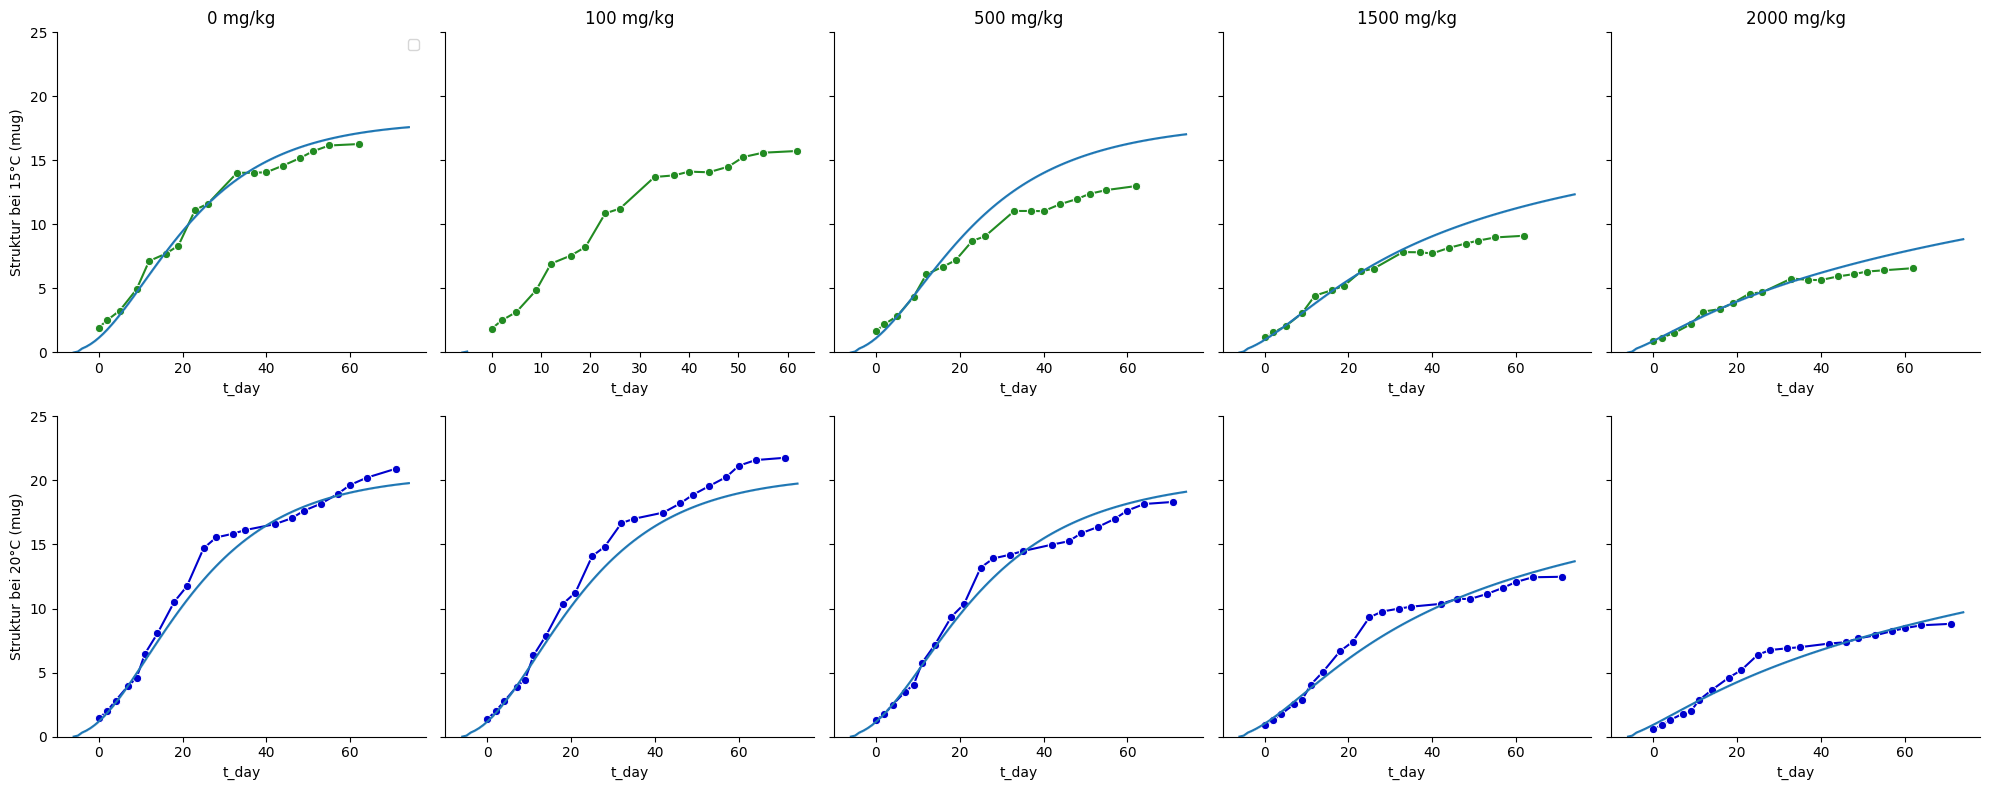

In [44]:
f = fit_model()

In [58]:
d = setup_modelfit("M")
d.define_lognorm_prior(sigma=0.5)
d.prior_predictive_check()

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: xlabel='kD_j', ylabel='Prior density'>,
        <Axes: xlabel='ED50_j'>, <Axes: xlabel='beta_j'>], dtype=object))

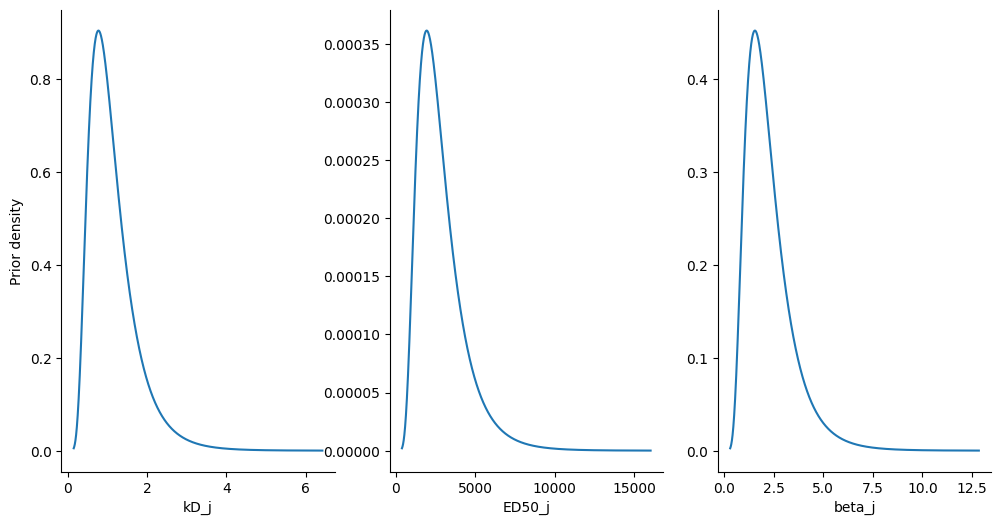

In [60]:
d.plot_priors()

In [63]:
d.run_bayesian_inference(
    popsize = 50,
    max_total_nr_simulations=100
)

c:\Users\ellar\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC.History INFO: Start <ABCSMC id=6, start_time=2025-03-05 18:51:02>
ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 7.50959075e-02.
c:\Users\ellar\anaconda3\envs\mempyfolsomia\Lib\site-packages\pyabc\storage\bytes_storage.py:37: UserWarning: Can't find pyarrow, falling back to less efficient csv to store pandas DataFrames.
Install e.g. via `pip install pyabc[pyarrow]`
  return df_to_bytes(object_)
ABC INFO: Accepted: 50 / 65 = 7.6923e-01, ESS: 5.0000e+01.
ABC INFO: Stop: Total simulations budget.
ABC.History INFO: Done <ABCSMC id=6, duration=0:03:03.715134, end_time=2025-03-05 18:54:05>


Conducted Bayesian inference using SMC-ABC. Results are in `abc_history` and `accepted`


In [64]:
d.posterior_sample()

{'kD_j': 0.6880794687798767,
 'ED50_j': 8456.220025491546,
 'beta_j': 1.4710474206948816}

In [65]:
d.retrodict()

In [68]:
d.retrodictions

[      t_day   C_W  level_2         S    R         X_emb            X  \
 0        -6     0        0  0.000010  0.0  1.032327e+00   100.000000   
 1        -6     0        1  0.000010  0.0  1.032327e+00   100.000000   
 2        -6     0      810  0.000010  0.0  1.032327e+00   100.000000   
 3        -6     0      811  0.000010  0.0  1.032327e+00   100.000000   
 4        -6   100      162  0.000010  0.0  1.032327e+00   100.000000   
 ...     ...   ...      ...       ...  ...           ...          ...   
 1615     74  1500     1457  9.354785  0.0 -6.026477e-09  7462.518327   
 1616     74  2000      808  6.037092  0.0 -8.243521e-10  7568.351701   
 1617     74  2000      809  6.037092  0.0 -8.243521e-10  7568.351701   
 1618     74  2000     1618  6.823506  0.0 -8.272009e-12  7540.580986   
 1619     74  2000     1619  6.823506  0.0 -8.272009e-12  7540.580986   
 
               D_j  T_cels      S_ref      R_ref  X_emb_ref        X_ref  \
 0        0.000000    15.0   0.000010   0.0000

In [67]:
sol = d.retrodictions

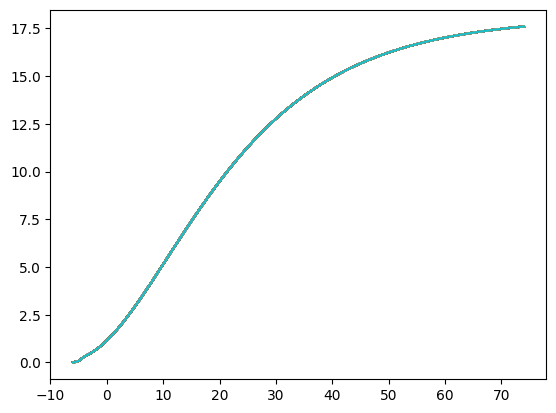

In [107]:
fig,ax = plt.subplots()

for i in range(100):
    sol_neu = sol[i][sol[i]['T_cels'] == 15]
    sol_neu = sol_neu[sol_neu['C_W'] == 0]
    ax.plot(sol_neu['t_day'],sol_neu['S'])


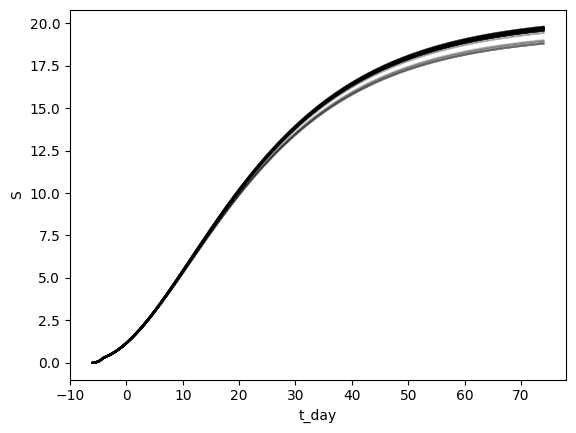

In [111]:
fig,ax = plt.subplots()

for i in range(30):
    sol_neu = sol[i][sol[i]['T_cels'] == 20]
    sol_neu = sol_neu[sol_neu['C_W'] == 100]

    sns.lineplot(data = sol_neu,x='t_day',y='S',alpha=0.2,color='black')